In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Downloads/P16-Self-Organizing-Maps/Self_Organizing_Maps/Credit_Card_Applications.csv')

In [3]:
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
df.isna().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

In [5]:
df.duplicated().any()

False

Fraud is an outlier in the dataset
1. Preprocessing the dataset
2. Building the SOM
3. Training the SOM model
4. Visulaizing the model

In [6]:
#extracting training and testing datasets
X = df.iloc[:,:-1].values #for obtaining it as a numpy array.
y = df.iloc[:,-1].values #for obtaining the class

In [7]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range=(0,1))
X = mm.fit_transform(X)

In [8]:
!pip install minisom


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from minisom import MiniSom

In [13]:
som = MiniSom(x = 10,y = 10,input_len = 15)
#here x,y denote the grid dimension on which the 15 features maps to decide a fradulent customer.

In [14]:
som.random_weights_init(X)
som.train_random(X,100)
#the dataset is X and the number of iteration is 100

MID decides whether an entry is a fraudulent customers' 

MID is Mean inter-neuron distence higher the MID ensures that it does not obey the usual trend hence categorized as an outlier.

In [16]:
from pylab import bone,pcolor,colorbar,plot,show

In [18]:
bone()#is the canvas like plt.figure produces a blank canvas

<Figure size 640x480 with 0 Axes>

y denotes whether the customer got approval for credit card or not it was already separated from the orginal dataset to catch the fradulent customers who were able to get approval.

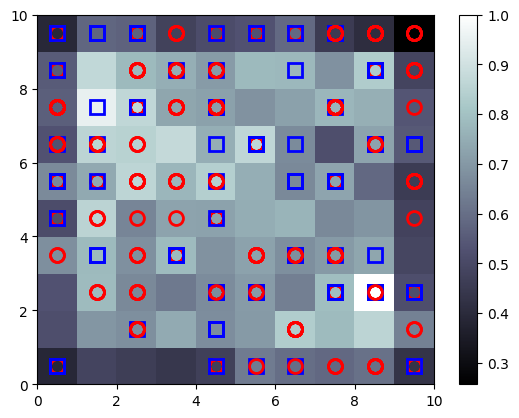

In [44]:
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','b']
#winning node is the same as best matching unit (BMU)

for i,x in enumerate(X):
    w = som.winner(x)#gives the BMU on input of a training example
    plot(w[0]+0.5,w[1]+0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2)
show()
#'o' denotes customer didn't get approval and 's' denote customer got approval

Hence we have identified that outliers do exist and we have concluded this via MID and the corresponding entries can be detected via inverse mapping of SOM to the particular training example.

In [53]:
mapping = som.win_map(X)#here the mapping is a dictionary object containing all the coordinate for mapping. 
fraudster = np.concatenate((mapping[(1,7)],mapping[(8,2)]),axis = 0)

In [55]:
fraudster = mm.inverse_transform(fraudster)

In [57]:
fraudster = pd.DataFrame(fraudster)

In [58]:
fraudster

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15572361.0,0.0,41.00,2.040,1.0,11.0,8.0,0.125,1.0,1.0,23.0,1.0,2.0,455.0,1237.0
1,15687688.0,0.0,21.67,11.500,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0,1.0
2,15638610.0,0.0,55.75,7.080,2.0,4.0,8.0,6.750,1.0,1.0,3.0,1.0,2.0,100.0,51.0
3,15789611.0,0.0,47.75,8.000,2.0,8.0,4.0,7.875,1.0,1.0,6.0,1.0,2.0,0.0,1261.0
4,15668679.0,0.0,47.42,3.000,2.0,14.0,4.0,13.875,1.0,1.0,2.0,1.0,2.0,519.0,1705.0
5,15738487.0,0.0,20.75,10.250,2.0,11.0,4.0,0.710,1.0,1.0,2.0,1.0,2.0,49.0,1.0
6,15649160.0,0.0,47.00,13.000,2.0,3.0,5.0,5.165,1.0,1.0,9.0,1.0,2.0,0.0,1.0
7,15773421.0,0.0,20.75,10.335,2.0,13.0,8.0,0.335,1.0,1.0,1.0,1.0,2.0,80.0,51.0
8,15682686.0,0.0,31.25,3.750,2.0,13.0,8.0,0.625,1.0,1.0,9.0,1.0,2.0,181.0,1.0
9,15781875.0,0.0,24.75,12.500,2.0,6.0,4.0,1.500,1.0,1.0,12.0,1.0,2.0,120.0,568.0


Hence we have found all the potential fraudulent entries on further investigations bank would be able to expunge all the guilty customers very easily. (These are those entires which have high MID i.e outliers and are still approved for credit cards)